In [1]:
import sys
import os
# sys.path.insert(0,'../')

from readgadget import *
from pygadgetreader import *
from pylab import *
import numpy as np

import h5py as h5
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

import numpy as np
import matplotlib.pylab as plt
import matplotlib.animation as anim
import subprocess

# Simulation info

In [2]:
boxsize = 320 #Mpc/h

# Files reading

In [8]:
# tip=('id' ,'num_p', 'mvir', 'mbound_vir', 'rvir', 'vmax', 'rvmax' ,'vrms' ,'x', 'y'
#      ,'z' ,'vx' ,'vy' ,'vz' , 'Jx', 'Jy', 'Jz', 'E' ,'Spin' ,'PosUncertainty', 'VelUncertainty' ,'bulk_vx', 
#      'bulk_vy', 'bulk_vz', 'BulkVelUnc', 'n_core' ,'m200b' ,'m200c' ,'m500c' ,'m2500c' ,'Xoff',' Voff' ,
#      'spin_bullock' ,'b_to_a',' c_to_a',' A[x]' ,'A[y]' ,'A[z]' ,'b_to_a(500c)' ,'c_to_a(500c)' ,'A[x](500c)' ,
#      'A[y](500c)' ,'A[z](500c)' ,'Rs' ,'Rs_Klypin', 'T/|U|',' M_pe_Behroozi', 'M_pe_Diemer',' Halfmass_Radius',
#      'idx' ,'i_so' ,'i_ph' ,'num_cp' ,'mmetric')
# doubl=['float64' for i in tip]
# halos = np.loadtxt('./../rockstar/halos_0.0.ascii', dtype={'names': tip, 'formats':doubl})

halos =np.loadtxt('./../rockstar/halos_0.0.ascii')
# m.readlines()
#
f=[]
# zrange=3
# for i in range(zrange):
i=3
f = h5.File('./../gevolution/output/lcdm_snap'+str(i).zfill(3)+'_cdm.h5')

number_of_halos =np.shape(halos)[0]

# Some information

In [9]:
print("number of halos:",number_of_halos)
print("number of particles:",np.shape(f['data']['positionX']) )

data = f['data'];
print(str(f.keys()) + "\n" ) 
print(str(data.dtype) + "\n")
print("IDs=", data['ID'].min(),data['ID'].max())

# #id num_p mvir mbound_vir rvir vmax rvmax vrms x y z vx vy vz Jx Jy Jz E Spin PosUncertainty VelUncertainty bulk_vx bulk_vy bulk_vz BulkVelUnc n_core m200b m200c m500c m2500c Xoff Voff spin_bullock b_to_a c_to_a A[x] A[y] A[z] b_to_a(500c) c_to_a(500c) A[x](500c) A[y](500c) A[z](500c) Rs Rs_Klypin T/|U| M_pe_Behroozi M_pe_Diemer Halfmass_Radius idx i_so i_ph num_cp mmetric\n',
#  '#a = 1.030863\n',
#  '#Om = 0.312046; Ol = 0.687954; h = 0.675560\n',
#  '#FOF linking length: 0.280000\n',
#  '#Unbound Threshold: 0.500000; FOF Refinement Threshold: 0.700000\n',
#  '#Particle mass: 1.08225e+13 Msun/h\n',
#  '#Box size: 320.000000 Mpc/h\n',
#  '#Total particles processed: 262144\n',
#  '#Force resolution assumed: 0.0679043 Mpc/h\n',
#  '#Units: Masses in Msun / h\n',
#  '#Units: Positions in Mpc / h (comoving)\n',
#  '#Units: Velocities in km / s (physical, peculiar)\n',
#  '#Units: Halo Distances, Lengths, and Radii in kpc / h (comoving)\n',
#  '#Units: Angular Momenta in (Msun/h) * (Mpc/h) * km/s (physical)\n',
#  '#Units: Spins are dimensionless\n',
#  '#Units: Total energy in (Msun/h)*(km/s)^2 (physical)\n',
#  '#Note: idx, i_so, and i_ph are internal debugging quantities\n',
#  '#Np is an internal debugging quantity.\n',
#  '#Rockstar Version: 0.99.9-RC3+\n',

('number of halos:', 126)
('number of particles:', (262144,))
[u'data', u'localBoxOffset', u'localBoxSize', u'numParts', u'part_info']

[('ID', '<i8'), ('positionX', '<f8'), ('positionY', '<f8'), ('positionZ', '<f8'), ('velocityX', '<f8'), ('velocityY', '<f8'), ('velocityZ', '<f8')]

('IDs=', 0, 262143)


In [10]:
# Halos
halo_info = np.zeros((number_of_halos,5)) # ID, pos(x,y,z), r
(halo_info[:,0], halo_info[:,1],halo_info[:,2],halo_info[:,3],halo_info[:,4]) = (halos[:,0],halos[:,8],halos[:,9],halos[:,10],
                                                                  halos[:,4]/1000.)#r_vir in kpc.h, pos in Mpc/h

#Particles
data = f['data'];
# print(f.keys())
# print(data.dtype)
# print(dset['ID'].min(),dset['ID'].max())
number_of_particles = np.shape(f['data']['ID'])[0]
#Making particles information
pcls_pos_vel = np.zeros((np.shape(data)[0],7)) 
pcls_pos_vel[:,0],pcls_pos_vel[:,1],pcls_pos_vel[:,2],pcls_pos_vel[:,3],pcls_pos_vel[:,4],pcls_pos_vel[:,5],pcls_pos_vel[:,6] = (
   data['positionX'], data['positionY'], data['positionZ'],data['velocityX'],data['velocityY'],data['velocityZ'],data['ID'] )
pcls_pos_vel[:,:3]=pcls_pos_vel[:,:3]*320;
# pos
# np.shape(pcls_pos_vel)
# pcls_pos_vel[:,0]==data['positionX']*320
# pos[0],data[0]
# halo_info[:,0]= halos[:,9]
# np.shape(halo_info)
# halo_info[0,:]

In [50]:
pcls_pos_vel[:,0]-x0

array([-277.0921096 , -274.78499904, -270.87506152, ...,    8.16470056,
          9.21612097,   11.86602449])

In [11]:
#halo_pcls has the information of halos and particles inside!
halo_particlas = []
R2_pcls = np.zeros((number_of_particles))
for i in range(number_of_halos):
    # ID, pos(x,y,z), r
    halo_ID = halo_info[i,0]
    rockstar_num_p = halos[i,1]
    x0 = halo_info[i,1]
    y0 = halo_info[i,2]
    z0 = halo_info[i,3]
    r_v = halo_info[i,4]
    R2_pcls[:] = (pcls_pos_vel[:,0]-x0)**2 + (pcls_pos_vel[:,1]-y0)**2 + (pcls_pos_vel[:,2]-z0)**2
    mask = R2_pcls<=9*r_v**2
    pcls_pos_vel_masked = pcls_pos_vel[mask]
    #     print("x",x0,"particle x", pos[:,0])
#     print(halo_ID,r_v**2,R2_pcls)
#     print(R2_pcls<=r_v**2)
    halo_particlas.append((halo_ID,rockstar_num_p,x0,y0,z0,r_v,pcls_pos_vel_masked))

In [29]:
#Number of particles in halo:
for i in range(number_of_halos):
    print("halo number = "+ str(halo_particlas[i][0]) + "  Particles found = " 
          + str(np.shape(halo_particlas[i][6])[0] ) + "  Rockstar= "+ str(halo_particlas[i][1]) )

halo number = 0.0  Particles found = 79  Rockstar= 70.0
halo number = 1.0  Particles found = 107  Rockstar= 89.0
halo number = 2.0  Particles found = 22  Rockstar= 43.0
halo number = 3.0  Particles found = 18  Rockstar= 23.0
halo number = 4.0  Particles found = 15  Rockstar= 38.0
halo number = 5.0  Particles found = 32  Rockstar= 40.0
halo number = 6.0  Particles found = 10  Rockstar= 23.0
halo number = 7.0  Particles found = 42  Rockstar= 58.0
halo number = 8.0  Particles found = 17  Rockstar= 40.0
halo number = 9.0  Particles found = 16  Rockstar= 21.0
halo number = 10.0  Particles found = 17  Rockstar= 39.0
halo number = 11.0  Particles found = 58  Rockstar= 58.0
halo number = 12.0  Particles found = 38  Rockstar= 51.0
halo number = 13.0  Particles found = 59  Rockstar= 108.0
halo number = 14.0  Particles found = 41  Rockstar= 54.0
halo number = 15.0  Particles found = 18  Rockstar= 21.0
halo number = 16.0  Particles found = 78  Rockstar= 67.0
halo number = 17.0  Particles found = 2

In [12]:
halo_particlas[1][0] # The halo number 1
halo_particlas[1][1] # posx of the halo in the lattice
np.shape(halo_particlas[1][6]) #The particles info inside the halo
halo_particlas[1][6][1,:]; #The particles info inside the halo, the last one is the ID od the particle
# print(np.shape(halo_particlas[2][6]))

# Some plots:

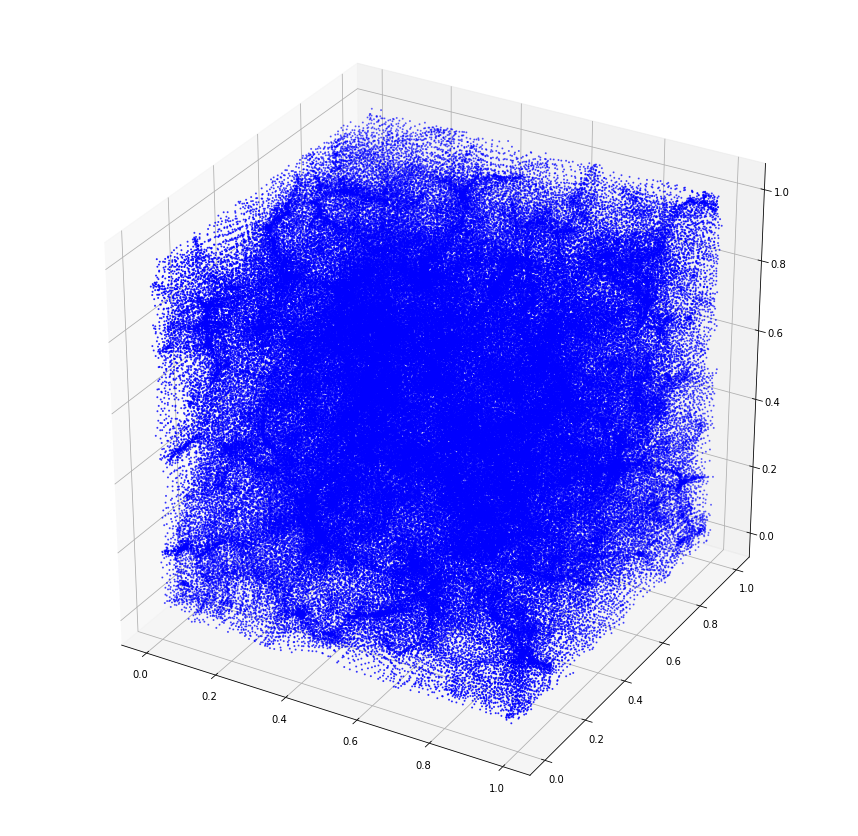

In [13]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111, projection='3d');
x = data['positionX']; 
y= data['positionY'];
z=data['positionZ'];
ax.scatter(x, y, z, c='b',s=1,label="z=0");

plt.show()

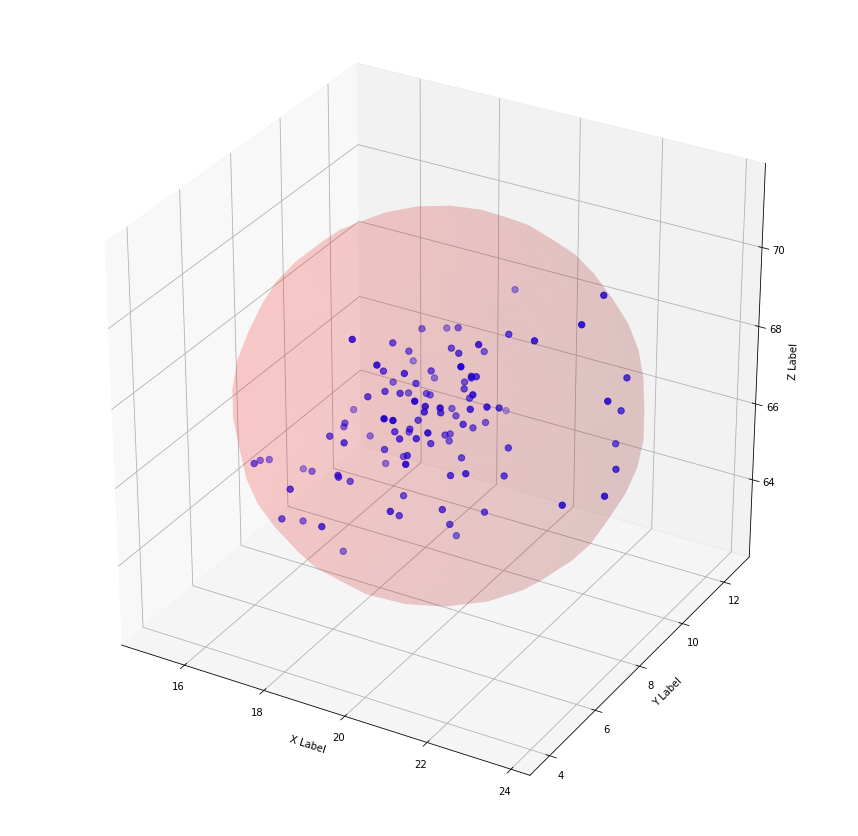

In [109]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111, projection='3d');
# halo_num=3
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
# x = np.cos(u)*np.sin(v)
# y = np.sin(u)*np.sin(v)
# z = np.cos(v)
for halo_num in range (1,2):
    r_vir = halo_particlas[halo_num][5]*3;
    x_halo =  r_vir*(np.cos(u)*np.sin(v) ) + halo_particlas[halo_num][2] 
    y_halo = r_vir*(np.sin(u)*np.sin(v)) + halo_particlas[halo_num][3] 
    z_halo = r_vir*(np.cos(v) ) + halo_particlas[halo_num][4] 

    x = halo_particlas[halo_num][6][:,0] 
    y =  halo_particlas[halo_num][6][:,1] 
    z =  halo_particlas[halo_num][6][:,2]

    ax.scatter(x, y, z, c='b',s=40,label="z=0");
#     ax.scatter(,y_halo,z_halo,c='red',label='$R_{vir}[Mpc/h]$')
    ax.plot_surface(x_halo, y_halo, z_halo,color='red' ,alpha=0.1, rstride=1, cstride=1, linewidth=0,)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')



# plt.legend()
plt.show()

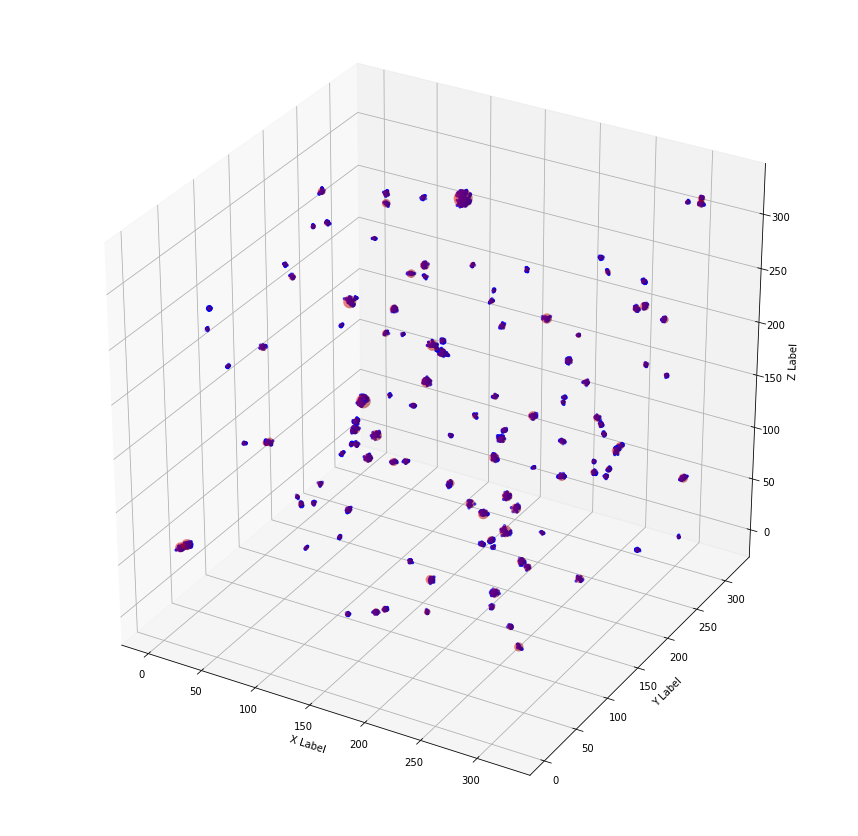

In [105]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111, projection='3d');
# halo_num=3
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
# x = np.cos(u)*np.sin(v)
# y = np.sin(u)*np.sin(v)
# z = np.cos(v)
for halo_num in range (number_of_halos):
# for halo_num in range ():

    r_vir = halo_particlas[halo_num][5]*3;
    x_halo =  r_vir*(np.cos(u)*np.sin(v) ) + halo_particlas[halo_num][2] 
    y_halo = r_vir*(np.sin(u)*np.sin(v)) + halo_particlas[halo_num][3] 
    z_halo = r_vir*(np.cos(v) ) + halo_particlas[halo_num][4] 

    x = halo_particlas[halo_num][6][:,0] 
    y =  halo_particlas[halo_num][6][:,1] 
    z =  halo_particlas[halo_num][6][:,2]

    ax.scatter(x, y, z, c='b',s=5,label="z=0");
#     ax.scatter(,y_halo,z_halo,c='red',label='$R_{vir}[Mpc/h]$')
    ax.plot_surface(x_halo, y_halo, z_halo,color='red' ,alpha=0.3, rstride=1, cstride=1, linewidth=0,)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')



# plt.legend()
plt.show()